
<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Repaso Módulo 1 - Optimización. </font> </center>



## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

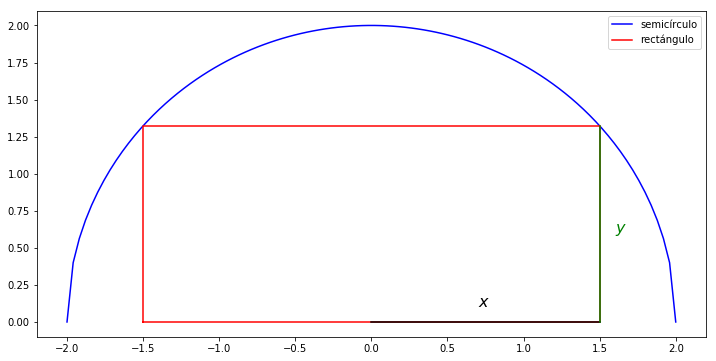

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

**Solución:**

---

Pitágoras: $x^2+y^2=4$

Despejando $y$: $y^2=4-x^2$

$$
y=\sqrt{4-x^2}
$$

Objetivo: Maximizar el área del rectángulo.

Área: $A=by$

Además $b=2x$ y $y=\sqrt{4-x^2}$

Por lo tanto $A=2x\sqrt{4-x^2}$

Para $0\leq x\leq2$ 

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [58]:
import sympy as sym

In [59]:
def A(x):
    return 2*x*(4-x**2)**(0.5)
sym.var('x',real=True)

x

In [60]:
A(x)

2*x*(4 - x**2)**0.5

In [61]:
dA=sym.diff(A(x),x)
c=sym.solve(dA,x)
c

[-1.41421356237310, 1.41421356237310]

In [62]:
c[1]

1.41421356237310

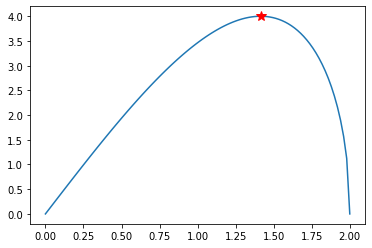

In [63]:
xnum=np.linspace(0,2,100)
ynum=A(xnum)
plt.plot(xnum,ynum)
plt.plot(c[1],A(c[1]),'*r',ms=10)

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [64]:
b=2*c[1]
y=(4-c[1]**2)**(0.5)
b,y

(2.82842712474619, 1.41421356237309)

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [10]:
import pandas as pd

In [4]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en $\LaTeX$ el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Solución:**

---

Objetivo: $x_1+x_2+x_3+x_4+x_5+x_6+x_7$

$c=[1,1,1,1,1,1,1]$

Restricciones:

$x_1+x_2+x_3+x_4+x_5\geq19$

$x_2+x_3+x_4+x_5+x_6\geq18$

$x_3+x_4+x_5+x_6+x_7\geq11$

$x_4+x_5+x_6+x_7+x_1\geq14$

$x_5+x_6+x_7+x_1+x_2\geq13$

$x_6+x_7+x_1+x_2+x_3\geq15$

$x_7+x_1+x_2+x_3+x_4\geq16$

$$
A=-\begin{bmatrix}
1&1&1&1&1&0&0\\
0&1&1&1&1&1&0\\
0&0&1&1&1&1&1\\
...
\end{bmatrix}
$$

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_csv('Salarios_minimos.csv')
datos

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90
5,1991.84,13.33
6,1993.00,14.27
7,1994.00,15.27
8,1995.00,16.34
9,1995.30,18.30


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

In [32]:
x=datos['Periodo'].values-1988
y=datos['Salario'].values

In [33]:
np.array(range(n+1))

array([0, 1, 2, 3])

In [34]:
def obj1(beta,x,y):
    f=beta[0]*x**0+beta[1]*x
    return np.sum((y-f)**2)

def objn(beta,x,y,n):
    #f=beta[0]*x**0+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    
    #beta=[1,-2,3]
    #[1,x,x**2]
    #1-2*x+3*x**2
    f=np.dot(beta,[x**i for i in range(n+1)])
    return np.sum((y-f)**2)


In [36]:
opt.minimize?

In [42]:
beta0=np.random.rand(2)
beta0

array([0.07114047, 0.2870966 ])

In [43]:
beta0=np.random.rand(2)
#beta0=np.array([1,1])
sol1=opt.minimize(objn,beta0,args=(x,y,1))
sol1

      fun: 276.88722086932216
 hess_inv: array([[ 0.05133886, -0.00258391],
       [-0.00258391,  0.00018226]])
      jac: array([0.00000000e+00, 7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([3.7155782 , 2.52832882])

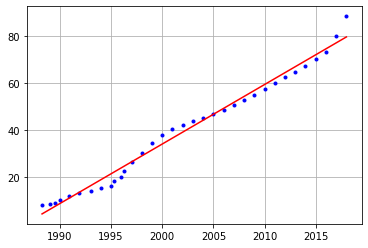

In [22]:
plt.plot(x+1988,y,'ob',ms=3)
n=1
pol=np.dot(sol1.x,[x**i for i in range(n+1)]) #evaluación de un polinomio de grado n
plt.plot(x+1988,pol,'r')
plt.grid()

In [45]:
n=3
beta0=np.random.rand(n+1)
sol2=opt.minimize(objn,beta0,args=(x,y,n))
sol2

      fun: 254.08498937465933
 hess_inv: array([[ 1.73588446e-01, -4.33560115e-02,  2.87429888e-03,
        -5.53762027e-05],
       [-4.33560115e-02,  1.52877943e-02, -1.16412842e-03,
         2.41848458e-05],
       [ 2.87429888e-03, -1.16412842e-03,  9.55891617e-05,
        -2.08094583e-06],
       [-5.53762027e-05,  2.41848458e-05, -2.08094583e-06,
         4.67466176e-08]])
      jac: array([0.00000000e+00, 5.72204590e-06, 6.67572021e-05, 1.72996521e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 13
     njev: 100
   status: 2
  success: False
        x: array([ 4.38105217e+00,  2.55802791e+00, -1.86352023e-02,  6.51692174e-04])

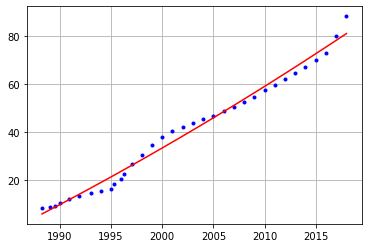

In [24]:
plt.plot(x+1988,y,'ob',ms=3)
pol=np.dot(sol2.x,[x**i for i in range(n+1)])
plt.plot(x+1988,pol,'r')
plt.grid()

In [10]:
n=3
beta0=np.random.rand(n+1)
sol3=opt.minimize(objn,beta0,args=(x,y,n))
sol3

      fun: 254.0849893708488
 hess_inv: array([[ 1.77683175e-01, -4.47206972e-02,  2.97638209e-03,
        -5.75114442e-05],
       [-4.47206972e-02,  1.57414690e-02, -1.19803651e-03,
         2.48947690e-05],
       [ 2.97638209e-03, -1.19803651e-03,  9.81211114e-05,
        -2.13394042e-06],
       [-5.75114442e-05,  2.48947690e-05, -2.13394042e-06,
         4.78540074e-08]])
      jac: array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -5.7220459e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 179
      nit: 12
     njev: 28
   status: 2
  success: False
        x: array([ 4.38105191e+00,  2.55802798e+00, -1.86352064e-02,  6.51692253e-04])

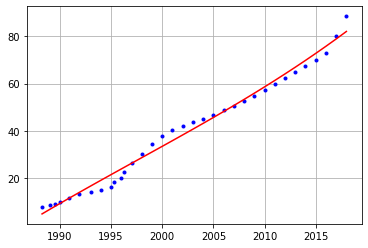

In [11]:
plt.plot(x+1988,y,'ob',ms=3)
pol=np.dot(sol3.x,[x**i for i in range(n+1)])
plt.plot(x+1988,pol,'r')
plt.grid()

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [12]:
n=1
x=2019-1988
np.dot(sol1.x,[x**i for i in range(n+1)])

82.09377169888752

In [13]:
n=2
x=2019-1988
np.dot(sol2.x,[x**i for i in range(n+1)])

83.97212196357806

In [14]:
n=3
x=2019-1988
np.dot(sol3.x,[x**i for i in range(n+1)])

85.18604975454514

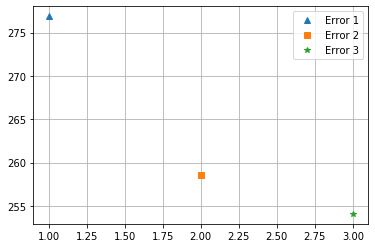

In [31]:
plt.plot(1,sol1.fun,'^',label='Error 1')
plt.plot(2,sol2.fun,'s',label='Error 2')
plt.plot(3,sol3.fun,'*',label='Error 3')
plt.legend(loc='best')
plt.grid()

In [27]:
x=datos['Periodo'].values-1988

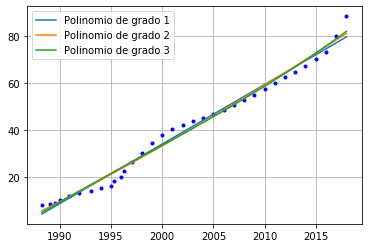

In [28]:
plt.plot(x+1988,y,'ob',ms=3) # Puntos para ajustar
n=1
pol1=np.dot(sol1.x,[x**i for i in range(n+1)]) # polinomio de grado 1
n=2
pol2=np.dot(sol2.x,[x**i for i in range(n+1)]) # polinomio de grado 2
n=3
pol3=np.dot(sol3.x,[x**i for i in range(n+1)]) # polinomio de grado 3
plt.plot(x+1988,pol1,label='Polinomio de grado 1')
plt.plot(x+1988,pol2,label='Polinomio de grado 2')
plt.plot(x+1988,pol3,label='Polinomio de grado 3')
plt.legend(loc='best')
plt.grid()